In [193]:
#pip install pandas==1.1.5

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as px
from openpyxl import load_workbook
from matplotlib.gridspec import GridSpec

In [195]:
print(pd.__version__)

1.1.5


In [196]:
raw = pd.read_csv('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/orphan_antitoxins_1/orphan_at_results/summary_per_strain.csv')
raw.head()

,Name,Num_new_hits,IDs
0,ST000580024,76,264P(NZ_CXYL01000002.1:minus:260970:261256);23...
1,ST001560086,75,238P(NZ_WVWF01000099.1:plus:202:534);254P(NZ_W...
2,ST000120082,73,226P(NZ_RRWK01000010.1:plus:1306:1557);187P(NZ...
3,ST001010100,95,270P(NZ_CP024821.1:plus:3332443:3332885);133P(...
4,ST001560062,64,26P(NZ_CP030331.1:plus:635608:636024);270P(NZ_...


In [197]:
raw.columns

Index(['Name', ' Num_new_hits', ' IDs'], dtype='object')

## <b> Average

In [198]:
#Add ST column
raw_d =raw.copy()
raw_d['ST'] = raw_d['Name'].str[2:-4].astype(int)
first_column = raw_d.pop('ST')
raw_d.insert(0, 'ST', first_column)
raw_d.head(3)

,ST,Name,Num_new_hits,IDs
0,58,ST000580024,76,264P(NZ_CXYL01000002.1:minus:260970:261256);23...
1,156,ST001560086,75,238P(NZ_WVWF01000099.1:plus:202:534);254P(NZ_W...
2,12,ST000120082,73,226P(NZ_RRWK01000010.1:plus:1306:1557);187P(NZ...


In [199]:
raw_d[' Num_new_hits'].sum()

73201

In [200]:
# Group the data by sequence type and calculate the average
averages = raw_d.groupby('ST')[' Num_new_hits'].mean()
averages = averages.to_frame().reset_index()

In [201]:
averages

,ST,Num_new_hits
0,10,78.620000
1,11,68.920000
2,12,63.285714
3,38,78.420000
4,48,124.860000
5,58,65.960000
6,69,65.800000
7,73,75.300000
8,95,74.760000
9,101,64.140000


In [202]:
averages.columns

Index(['ST', ' Num_new_hits'], dtype='object')

In [203]:
averages['ST'] = 'ST' + averages['ST'].astype(str)

Text(0, 0.5, 'Orphan antitoxins (average)')

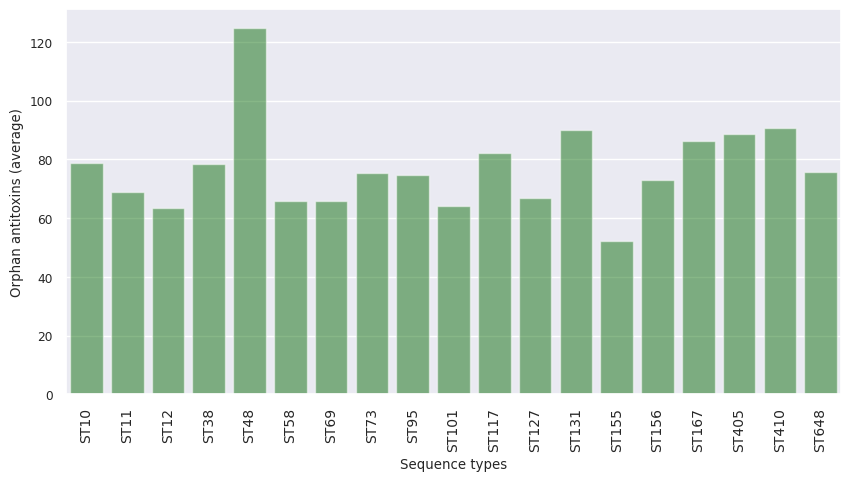

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include rows where Num_new_hits > 0
filtered_df = averages[averages[' Num_new_hits'] > 0]

# Set the figure size
plt.figure(figsize=(10, 5))

# Plot a bar chart with error bars
ax = sns.barplot(x="ST", y=" Num_new_hits", data=averages,color='green', alpha = 0.5)

# Rotate x-axis labels and set their size
ax.tick_params(axis='x', rotation=90, labelsize=10)
ax.set_xlabel('Sequence types')
ax.set_ylabel('Orphan antitoxins (average)')
# Display the plot
#plt.show()
#plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/Publication_material/pictures/main/orphans.tiff', dpi=300)



## <b> heatmap

In [205]:
original_partners = pd.read_csv('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/raw_files/partners.csv')

In [206]:
original_partners.head()

,Strain,1P-Polyketide_cyc2,2P-Cpta_toxin,3P-Cpta_toxin,4P-Fic,5P-GNAT_acetyltran,6P-GNAT_acetyltran,7P-GnsAB_toxin,8P-Toxin_YhaV,9P-CbtA_toxin,...,281P-ParE_toxin,282P-YafQ_toxin,283P-ParE_toxin,284P-CbtA_toxin,285P-HipA_C,286P-NTP_transf_2,287P-ParE_toxin,288P-HigB-like_toxin,289P-HipA_C,290P-CbtA_toxin
0,ST001670050,1,1,1,1,1,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,ST006480109,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ST000730234,1,1,1,1,1,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
3,ST000580141,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,ST000380050,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [207]:
original_partners.columns = original_partners.columns.str.split('-').str[0]

In [208]:
original_partners.set_index('Strain')

,1P,2P,3P,4P,5P,6P,7P,8P,9P,10P,...,281P,282P,283P,284P,285P,286P,287P,288P,289P,290P
Strain,,,,,,,,,,,,,,,,,,,,,
ST001670050,1,1,1,1,1,1,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
ST006480109,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ST000730234,1,1,1,1,1,1,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
ST000580141,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
ST000380050,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ST000730066,1,1,1,1,1,1,1,1,3,1,...,0,0,0,0,0,0,0,0,0,0
ST004050104,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ST000100860,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [209]:
original_partners.columns 

Index(['Strain', '1P', '2P', '3P', '4P', '5P', '6P', '7P', '8P', '9P',
       ...
       '281P', '282P', '283P', '284P', '285P', '286P', '287P', '288P', '289P',
       '290P'],
      dtype='object', length=291)

In [210]:
#separate individual partners and remove unwanted string
raw[' IDs'] = raw[' IDs'].str.split(';').apply(lambda x: [item.split('(')[0] for item in x])

In [211]:
#extract unique IDs
unique_ids = list(set([id for sublist in raw[' IDs'] for id in sublist]))
unique_ids.sort(key=lambda x: int(x.split('P')[0]))
len(unique_ids)

176

In [212]:
# Create a dictionary to store the presence of each unique ID
id_presence = {}
for id in unique_ids:
    id_presence[id] = []
    
# Iterate over each row and update the id_presence dictionary
for row in raw.itertuples():
    for id in unique_ids:
        if id in row[3]:
            id_presence[id].append(1)
        else:
            id_presence[id].append(0)
            
# Create a new dataframe with the id_presence dictionary
d = pd.DataFrame(id_presence)

In [213]:
d.head()

,1P,2P,3P,4P,5P,6P,7P,8P,9P,10P,...,270P,275P,276P,278P,280P,282P,284P,286P,289P,290P
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,1,0,...,1,1,0,1,0,0,1,0,0,1
2,0,0,0,0,1,0,0,0,1,0,...,1,1,0,1,0,0,1,0,0,1
3,0,0,0,0,1,0,0,0,1,0,...,1,1,0,1,0,0,1,0,0,1
4,0,0,0,0,1,0,0,0,1,0,...,1,1,0,1,0,0,1,1,0,1


In [214]:
# Add the original columns to the new dataframe
d['Strain'] = raw['Name']
d.head()

,1P,2P,3P,4P,5P,6P,7P,8P,9P,10P,...,275P,276P,278P,280P,282P,284P,286P,289P,290P,Strain
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,ST000580024
1,0,0,0,0,1,0,0,0,1,0,...,1,0,1,0,0,1,0,0,1,ST001560086
2,0,0,0,0,1,0,0,0,1,0,...,1,0,1,0,0,1,0,0,1,ST000120082
3,0,0,0,0,1,0,0,0,1,0,...,1,0,1,0,0,1,0,0,1,ST001010100
4,0,0,0,0,1,0,0,0,1,0,...,1,0,1,0,0,1,1,0,1,ST001560062


In [215]:
#presence absence
d = d.set_index('Strain')


In [216]:
column_sums = d.sum()
column_sums

1P        1
2P        1
3P        2
4P        3
5P      426
       ... 
282P      4
284P    948
286P    204
289P     72
290P    903
Length: 176, dtype: int64

In [217]:
original_partners

,Strain,1P,2P,3P,4P,5P,6P,7P,8P,9P,...,281P,282P,283P,284P,285P,286P,287P,288P,289P,290P
0,ST001670050,1,1,1,1,1,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,ST006480109,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ST000730234,1,1,1,1,1,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
3,ST000580141,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,ST000380050,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,ST000730066,1,1,1,1,1,1,1,1,3,...,0,0,0,0,0,0,0,0,0,0
946,ST004050104,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
947,ST000100860,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
948,ST001550161,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
column_order = original_partners.columns[1:291]

In [219]:
column_order 

Index(['1P', '2P', '3P', '4P', '5P', '6P', '7P', '8P', '9P', '10P',
       ...
       '281P', '282P', '283P', '284P', '285P', '286P', '287P', '288P', '289P',
       '290P'],
      dtype='object', length=290)

In [220]:
# Sort the columns of df1 according to the column order of df2
d = d.reindex(columns=column_order)

# Add any missing columns in df1 with zero-filled values
missing_columns = set(column_order) - set(d.columns)
for column in missing_columns:
    df[column] = 0

# Update all the rows in df1 based on the column order
d = d[column_order]
d = d.fillna(0).astype(int)

In [221]:
d.head()

,1P,2P,3P,4P,5P,6P,7P,8P,9P,10P,...,281P,282P,283P,284P,285P,286P,287P,288P,289P,290P
Strain,,,,,,,,,,,,,,,,,,,,,
ST000580024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
ST001560086,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
ST000120082,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
ST001010100,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
ST001560062,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1


In [222]:
d.sum()

1P        1
2P        1
3P        2
4P        3
5P      426
       ... 
286P    204
287P      0
288P      0
289P     72
290P    903
Length: 290, dtype: int64

In [223]:
#Save original datafram to excel file
path = "/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/interproscan/interpro_analysis_files//Orphan_antitoxins.xlsx"
d.to_excel(path, sheet_name='Orphan_antitoxins')

In [224]:
#Add ST column
df = d.copy()
df['ST'] = df.index.str[2:-4].astype(int)
first_column = df.pop('ST')
df.insert(0, 'ST', first_column)
df.head(3)

,ST,1P,2P,3P,4P,5P,6P,7P,8P,9P,...,281P,282P,283P,284P,285P,286P,287P,288P,289P,290P
Strain,,,,,,,,,,,,,,,,,,,,,
ST000580024,58,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
ST001560086,156,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
ST000120082,12,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [225]:
#total no of toxins 
a= df.reset_index()
a = a.drop('Strain', axis = 1)
a = a.set_index('ST')
a_sum = a.sum(axis = 1)
a_sum = a_sum.to_frame()
a_sum.rename(columns = {0:'Total no of orphan_antitoxins'}, inplace = True)
a_sum = a_sum.reset_index()
a_sum['ST'] = 'ST' + a_sum['ST'].astype(str)
a_sum.head()

,ST,Total no of orphan_antitoxins
0,ST58,38
1,ST156,48
2,ST12,47
3,ST101,54
4,ST156,47


In [226]:
a_sum.shape

(949, 2)

In [227]:
#descriptive statistics
d_stat=  a_sum.groupby(['ST']).describe()
d_stat

Total no of orphan_antitoxins                                          \
                              count       mean       std   min    25%   50%   
ST                                                                            
ST10                           50.0  42.360000  5.847588  34.0  39.00  41.0   
ST101                          50.0  43.060000  6.270794  29.0  39.00  43.0   
ST11                           50.0  52.440000  2.704192  48.0  50.00  53.0   
ST117                          50.0  43.300000  1.832251  39.0  42.00  43.0   
ST12                           49.0  39.877551  4.060135  31.0  37.00  40.0   
ST127                          50.0  42.720000  4.681880  28.0  40.00  42.0   
ST131                          50.0  48.700000  2.651530  42.0  47.00  49.0   
ST155                          50.0  44.280000  4.290664  30.0  42.00  44.0   
ST156                          50.0  44.780000  5.470850  27.0  42.00  45.0   
ST167                          50.0  44.320000  2.706304  38.0  43.00  44.0   
ST38                           50.0  48.380000  4.628616  36.0  46.00  49.0   
ST405                          50.0  53.280000  3.747326  45.0  50.00  53.5   
ST410                          50.0  47.240000  4.591741  40.0  43.00  47.5   
ST48                           50.0  43.920000  4.601863  34.0  41.00  43.5   
ST58                           50.0  46.200000  3.664502  35.0  44.00  47.0   
ST648                          50.0  45.680000  4.377307  34.0  44.00  44.0   
ST69                           50.0  42.580000  4.398933  23.0  42.00  44.0   
ST73                           50.0  40.820000  2.413313  37.0  38.25  41.0   
ST95                           50.0  43.200000  3.469988  37.0  40.00  43.0   

                    
         75%   max  
ST                  
ST10   43.75  72.0  
ST101  47.00  54.0  
ST11   55.00  58.0  
ST117  44.00  49.0  
ST12   42.00  49.0  
ST127  46.00  58.0  
ST131  50.00  54.0  
ST155  47.00  51.0  
ST156  48.00  55.0  
ST167  46.00  49.0  
ST38   50.00  62.0  
ST405  56.00  61.0  
ST410  51.00  55.0  
ST48   46.75  60.0  
ST58   49.00  53.0  
ST648  48.00  54.0  
ST69   45.00  49.0  
ST73   43.00  46.0  
ST95   46.00  51.0

Text(0, 0.5, 'No of antitoxins')

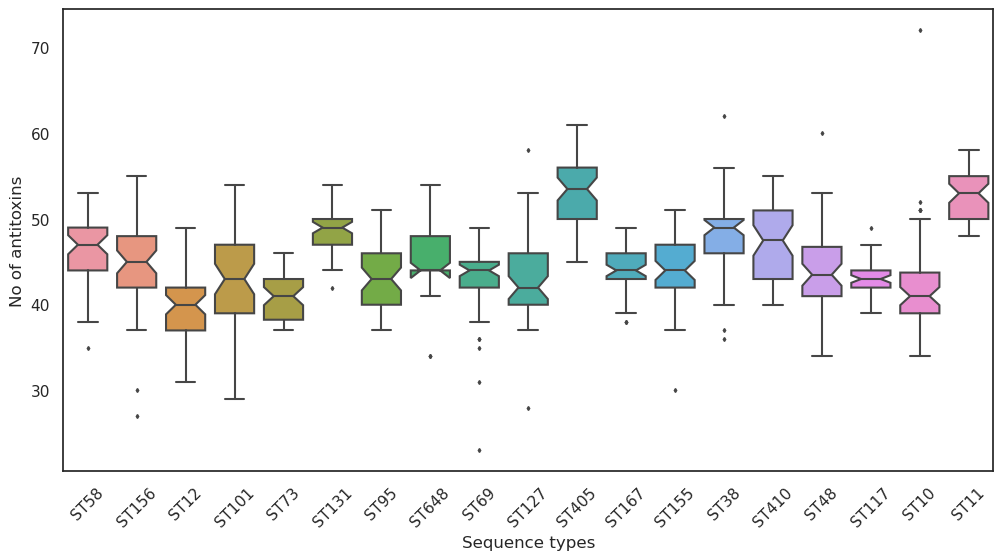

In [228]:
#Boxpllot 
sns.set(rc = {'figure.figsize':(12,6)})
sns.set_style("white")
sns.boxplot(data=a_sum, x = 'ST', y = 'Total no of orphan_antitoxins', notch=True, fliersize=2, whis=1.5)
plt.xlabel("Sequence types")
plt.xticks(rotation=45)
plt.ylabel("No of antitoxins")

In [229]:
#descriptive statistics
d_stat=  a_sum.groupby(['ST']).describe()
d_stat

Total no of orphan_antitoxins                                          \
                              count       mean       std   min    25%   50%   
ST                                                                            
ST10                           50.0  42.360000  5.847588  34.0  39.00  41.0   
ST101                          50.0  43.060000  6.270794  29.0  39.00  43.0   
ST11                           50.0  52.440000  2.704192  48.0  50.00  53.0   
ST117                          50.0  43.300000  1.832251  39.0  42.00  43.0   
ST12                           49.0  39.877551  4.060135  31.0  37.00  40.0   
ST127                          50.0  42.720000  4.681880  28.0  40.00  42.0   
ST131                          50.0  48.700000  2.651530  42.0  47.00  49.0   
ST155                          50.0  44.280000  4.290664  30.0  42.00  44.0   
ST156                          50.0  44.780000  5.470850  27.0  42.00  45.0   
ST167                          50.0  44.320000  2.706304  38.0  43.00  44.0   
ST38                           50.0  48.380000  4.628616  36.0  46.00  49.0   
ST405                          50.0  53.280000  3.747326  45.0  50.00  53.5   
ST410                          50.0  47.240000  4.591741  40.0  43.00  47.5   
ST48                           50.0  43.920000  4.601863  34.0  41.00  43.5   
ST58                           50.0  46.200000  3.664502  35.0  44.00  47.0   
ST648                          50.0  45.680000  4.377307  34.0  44.00  44.0   
ST69                           50.0  42.580000  4.398933  23.0  42.00  44.0   
ST73                           50.0  40.820000  2.413313  37.0  38.25  41.0   
ST95                           50.0  43.200000  3.469988  37.0  40.00  43.0   

                    
         75%   max  
ST                  
ST10   43.75  72.0  
ST101  47.00  54.0  
ST11   55.00  58.0  
ST117  44.00  49.0  
ST12   42.00  49.0  
ST127  46.00  58.0  
ST131  50.00  54.0  
ST155  47.00  51.0  
ST156  48.00  55.0  
ST167  46.00  49.0  
ST38   50.00  62.0  
ST405  56.00  61.0  
ST410  51.00  55.0  
ST48   46.75  60.0  
ST58   49.00  53.0  
ST648  48.00  54.0  
ST69   45.00  49.0  
ST73   43.00  46.0  
ST95   46.00  51.0

In [230]:
df.shape

(949, 291)

In [231]:
#group by ST
genes =df.groupby(by=['ST'])

In [232]:
genes.head()

,ST,1P,2P,3P,4P,5P,6P,7P,8P,9P,...,281P,282P,283P,284P,285P,286P,287P,288P,289P,290P
Strain,,,,,,,,,,,,,,,,,,,,,
ST000580024,58,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
ST001560086,156,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
ST000120082,12,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
ST001010100,101,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
ST001560062,156,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ST000690013,69,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
ST000690023,69,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
ST000690045,69,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [233]:
# Write data from groups into individual dataframes
df_list=[]
for i in genes.groups:
    tag='ST'+str(i)+'_df'
    #print(tag)
    df_list.append(tag)
    globals()[tag] =pd.DataFrame(genes.get_group(i))
    print("Shape of {}:\t{}".format(tag,globals()[tag].shape))

Shape of ST10_df:	(50, 291)
Shape of ST11_df:	(50, 291)
Shape of ST12_df:	(49, 291)
Shape of ST38_df:	(50, 291)
Shape of ST48_df:	(50, 291)
Shape of ST58_df:	(50, 291)
Shape of ST69_df:	(50, 291)
Shape of ST73_df:	(50, 291)
Shape of ST95_df:	(50, 291)
Shape of ST101_df:	(50, 291)
Shape of ST117_df:	(50, 291)
Shape of ST127_df:	(50, 291)
Shape of ST131_df:	(50, 291)
Shape of ST155_df:	(50, 291)
Shape of ST156_df:	(50, 291)
Shape of ST167_df:	(50, 291)
Shape of ST405_df:	(50, 291)
Shape of ST410_df:	(50, 291)
Shape of ST648_df:	(50, 291)


In [234]:
df_list

['ST10_df',
 'ST11_df',
 'ST12_df',
 'ST38_df',
 'ST48_df',
 'ST58_df',
 'ST69_df',
 'ST73_df',
 'ST95_df',
 'ST101_df',
 'ST117_df',
 'ST127_df',
 'ST131_df',
 'ST155_df',
 'ST156_df',
 'ST167_df',
 'ST405_df',
 'ST410_df',
 'ST648_df']

In [235]:
ST12_df.head(2)

,ST,1P,2P,3P,4P,5P,6P,7P,8P,9P,...,281P,282P,283P,284P,285P,286P,287P,288P,289P,290P
Strain,,,,,,,,,,,,,,,,,,,,,
ST000120082,12,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
ST000120046,12,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1


In [236]:
def t_percentage(k,tag):

    df_h=k.copy()
    #df_h.head()
    x=list(df_h.columns)
    #print(x)
    size=df_h.shape[0]
    #print(size)
    df_antitoxin=pd.DataFrame(columns=['antitoxins',tag])
    #print(df_antitoxin.head())
    for i in x:
        #print(df_h[i])
        s=df_h[i].astype(int).sum()
        #print(s)
        p=(s/size)*100

        df_antitoxin = df_antitoxin.append({'antitoxins': i,tag:p}, ignore_index=True)



    return(df_antitoxin)

In [237]:
#Calculate percentage of gene presence in each ST
antitoxin_list=[]
for i in df_list:
    d=globals()[i].copy()
    d.drop('ST', axis=1,inplace=True)
    x=i.replace('df','at')
    y=i.replace('_df','')
    antitoxin_list.append(x)
    globals()[x]=t_percentage(d,y)
    print(x,globals()[x].shape)

ST10_at (290, 2)
ST11_at (290, 2)
ST12_at (290, 2)
ST38_at (290, 2)
ST48_at (290, 2)
ST58_at (290, 2)
ST69_at (290, 2)
ST73_at (290, 2)
ST95_at (290, 2)
ST101_at (290, 2)
ST117_at (290, 2)
ST127_at (290, 2)
ST131_at (290, 2)
ST155_at (290, 2)
ST156_at (290, 2)
ST167_at (290, 2)
ST405_at (290, 2)
ST410_at (290, 2)
ST648_at (290, 2)


In [238]:
def merge_dataframe(list):
    l=list.copy()
    x=l.pop(0)
    x_df=globals()[x]
    for i in l:
        x_df=pd.merge(x_df,globals()[i],how='outer',on='antitoxins').fillna(0)
    return(x_df)

In [239]:
# Merge the dataframes
at_df=merge_dataframe(antitoxin_list)
at_df.head(10)

,antitoxins,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,ST101,ST117,ST127,ST131,ST155,ST156,ST167,ST405,ST410,ST648
0,1P,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2P,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3P,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
3,4P,4.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5P,34.0,66.0,36.734694,40.0,60.0,56.0,34.0,24.0,30.0,58.0,38.0,34.0,34.0,44.0,48.0,62.0,54.0,64.0,36.0
5,6P,4.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,0.0,0.0,0.0,0.0,2.0,4.0
6,7P,2.0,94.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
7,8P,0.0,0.0,0.000000,0.0,10.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0
8,9P,28.0,100.0,97.959184,92.0,78.0,80.0,98.0,100.0,100.0,78.0,100.0,96.0,96.0,72.0,94.0,90.0,100.0,68.0,96.0
9,10P,4.0,0.0,6.122449,0.0,2.0,22.0,0.0,12.0,0.0,0.0,0.0,6.0,6.0,2.0,0.0,0.0,94.0,2.0,0.0


In [240]:
#Partner_annotation
p_annot = pd.read_csv('Partner_annot_pfam.csv', header = None)
p_annot['SortKey'] = p_annot[0].str.extract('(\d+)').astype(int)
p_annot = p_annot.sort_values(by='SortKey').drop('SortKey', axis=1).reset_index()
p_annot = p_annot.drop(['index'], axis = 1)
p_annot.rename({0:'Partner Id', 1:'Hits', 2:'DB', 3:'pfam_ID', 4:'pfam_desc', 5:'interpro_desc', 6:'short_name'}, axis = 1, inplace = True)
p_annot.drop(['Hits', 'DB','pfam_ID', 'pfam_desc', 'interpro_desc'], axis = 1, inplace = True)
p_annot.head()

,Partner Id,short_name
0,1P,1P-Ub-RnfH
1,2P,2P-Sdh5
2,3P,3P-
3,4P,4P-YhfG
4,5P,5P-DMT_YdcZ


In [241]:
at_df.rename(columns = {'antitoxins':'Partner Id'}, inplace =True)

In [242]:
at_df.head()

,Partner Id,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,ST101,ST117,ST127,ST131,ST155,ST156,ST167,ST405,ST410,ST648
0,1P,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2P,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3P,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
3,4P,4.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5P,34.0,66.0,36.734694,40.0,60.0,56.0,34.0,24.0,30.0,58.0,38.0,34.0,34.0,44.0,48.0,62.0,54.0,64.0,36.0


In [243]:
p_annot['short_name'] = p_annot['short_name'].apply(lambda x: x + 'UNKW' if x.endswith('-') else x)
#merge Pfam annotation
at_df=at_df.merge(p_annot, how='left', on='Partner Id')
at_df['Partner Id'] = at_df['Partner Id'].apply(lambda x: x + ')')
at_df['Partner Id'] = at_df['Partner Id'].apply(lambda x: '(' + x)

In [244]:
at_df['antitoxins'] = at_df['short_name'] + ' ' + at_df['Partner Id']


In [245]:
at_df[['k1', 'antitoxins']] = at_df['antitoxins'].str.split('-', n=1, expand=True)

In [246]:
at_df.drop(['short_name', 'Partner Id', 'k1'], axis = 1, inplace = True)

In [247]:
antitoxin_df=at_df.copy()
#antitoxin_df.set_index('Partner Id',inplace=True)
antitoxin_df.head()

,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,ST101,ST117,ST127,ST131,ST155,ST156,ST167,ST405,ST410,ST648,antitoxins
0,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ub-RnfH (1P)
1,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sdh5 (2P)
2,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,UNKW (3P)
3,4.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,YhfG (4P)
4,34.0,66.0,36.734694,40.0,60.0,56.0,34.0,24.0,30.0,58.0,38.0,34.0,34.0,44.0,48.0,62.0,54.0,64.0,36.0,DMT_YdcZ (5P)


In [248]:

#path of preexisting file
path = "/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/interproscan/interpro_analysis_files/Orphan_antitoxins.xlsx"
# Generating workbook
book = load_workbook(path)
# Generating the writer engine
writer = pd.ExcelWriter(path, engine = 'openpyxl')
# Assigning the workbook to the writer engine
writer.book = book
# Adding the DataFrames to the excel as a new sheet
antitoxin_df.to_excel(writer, sheet_name = '%presence')
writer.save()
writer.close()

In [249]:
antitoxin_df.shape

(290, 20)

In [250]:
antitoxin_df = antitoxin_df.set_index('antitoxins')

In [251]:
antitoxin_df.shape

(290, 19)

In [252]:
def select_rows(df):
    d1=df.copy()
    d2=pd.DataFrame()
    for index, row in d1.iterrows():
        score =0 
        #print(index)
        for i in d1.columns:
            
            if(row[i]>=20):
                #print(index, row[i] )
                score=score+1

        #print(index, score)
        
        if(score >0):
            d2=d2.append(d1.loc[index])
    return(d2)

In [253]:
new_df = select_rows(antitoxin_df)

In [254]:
new_df.shape

(104, 19)

In [255]:
new_df.head()

,ST10,ST101,ST11,ST117,ST12,ST127,ST131,ST155,ST156,ST167,ST38,ST405,ST410,ST48,ST58,ST648,ST69,ST73,ST95
DMT_YdcZ (5P),34.0,58.0,66.0,38.0,36.734694,34.0,34.0,44.0,48.0,62.0,40.0,54.0,64.0,60.0,56.0,36.0,34.0,24.0,30.0
UNKW (6P),4.0,0.0,0.0,0.0,0.000000,0.0,88.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0
YmcE_antitoxin (7P),2.0,0.0,94.0,0.0,0.000000,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
DUF5983 (9P),28.0,78.0,100.0,100.0,97.959184,96.0,96.0,72.0,94.0,90.0,92.0,100.0,68.0,78.0,80.0,96.0,98.0,100.0,100.0
HTH_3 (10P),4.0,0.0,0.0,0.0,6.122449,6.0,6.0,2.0,0.0,0.0,0.0,94.0,2.0,2.0,22.0,0.0,0.0,12.0,0.0


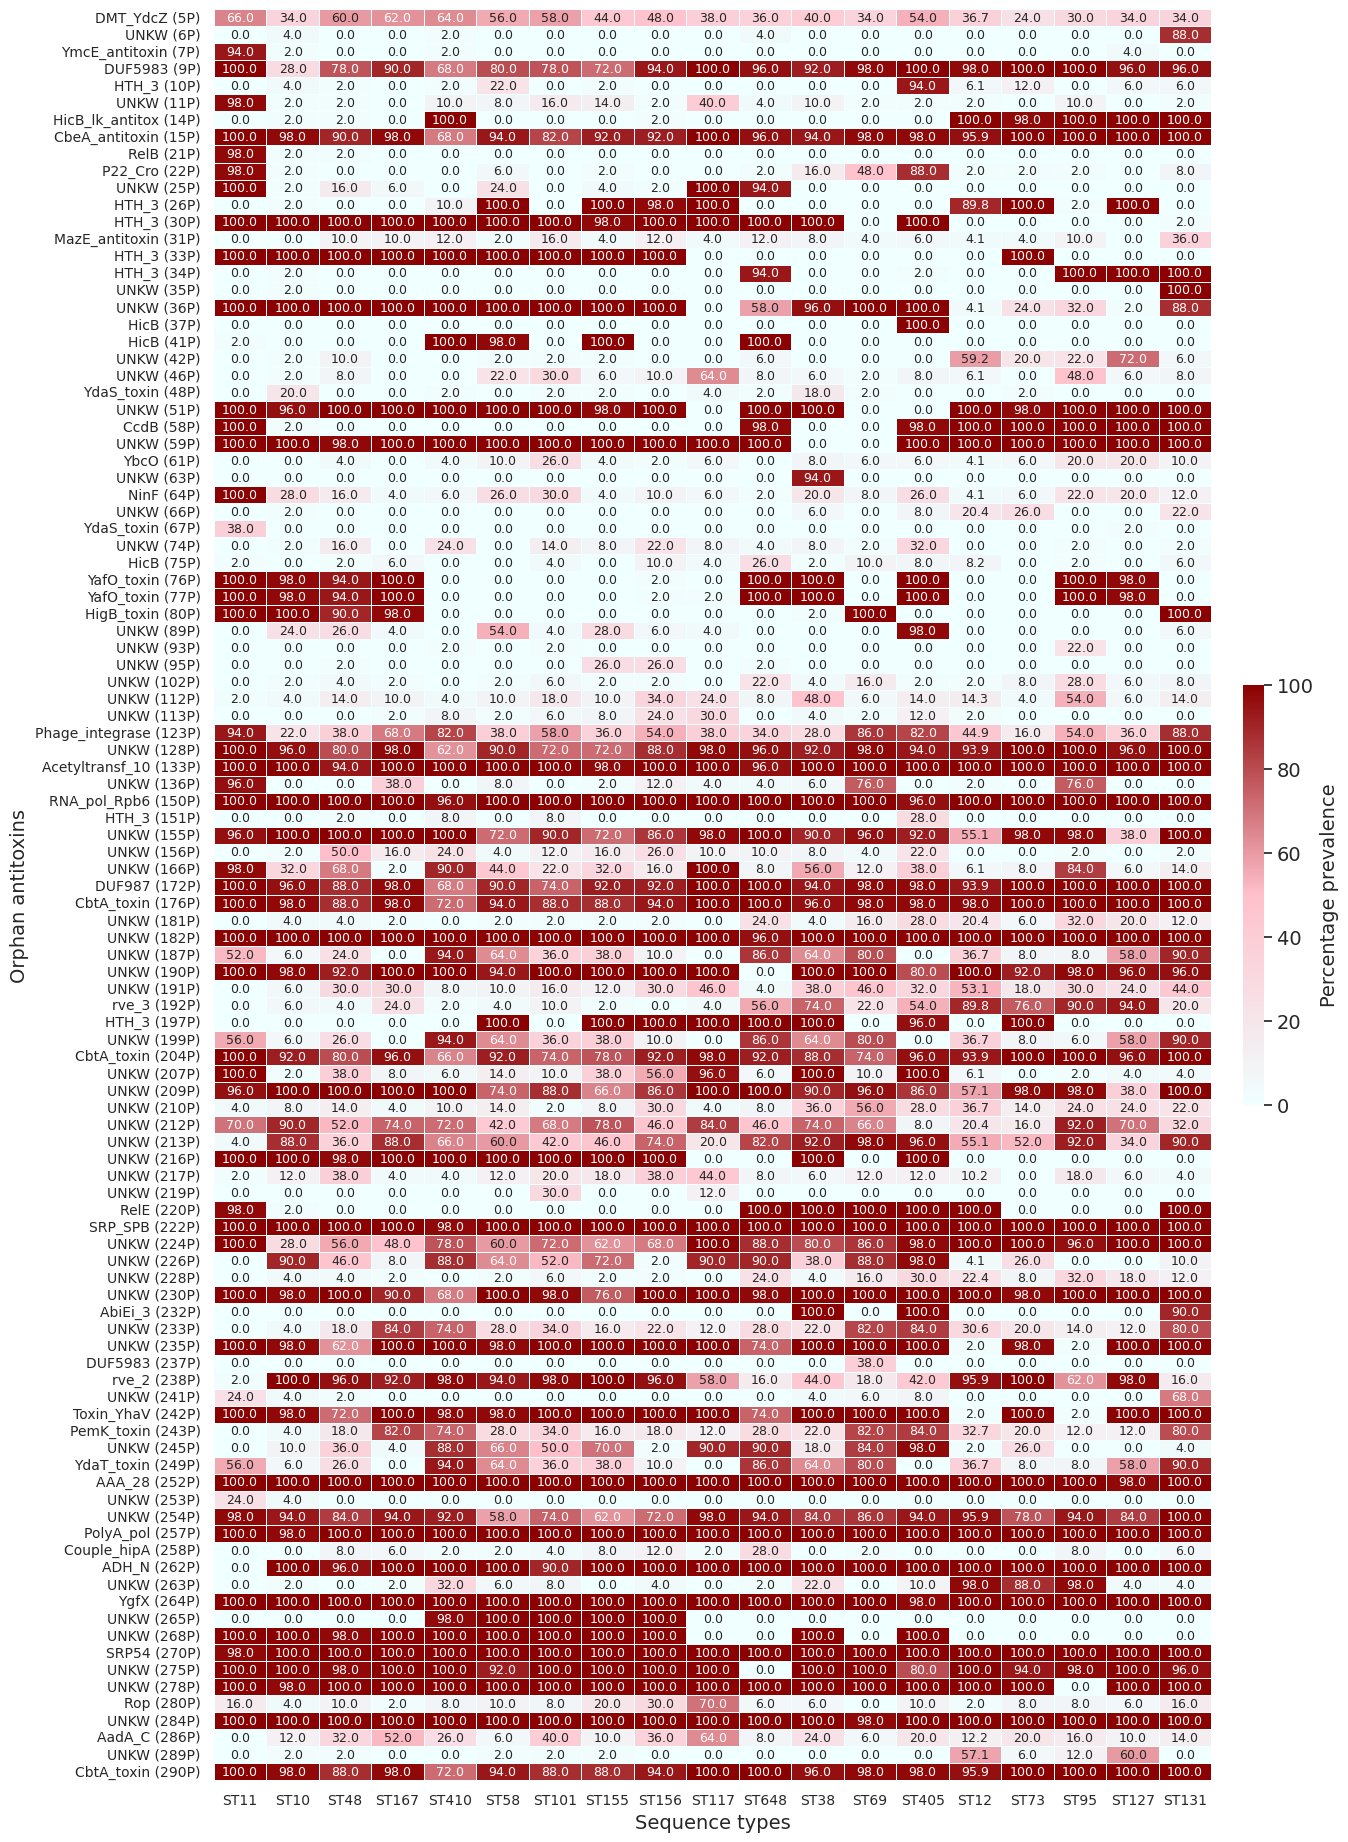

In [256]:
##For publication

# define ST order
ST_new_order = ['ST11', 'ST10', 'ST48', 'ST167', 'ST410', 'ST58', 'ST101',
                'ST155', 'ST156', 'ST117', 'ST648', 'ST38', 'ST69',
                'ST405', 'ST12', 'ST73', 'ST95', 'ST127', 'ST131']

# set font scale
sns.set(font_scale=0.8)

#set figure size 
plt.figure(figsize=(15, 23))

#ordered dataframe
new_df_order = new_df.reindex(columns=ST_new_order)

#set cmap
#cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
import matplotlib.colors as mcolors

# Adjust color points to create a smoother transition
colors = ['azure', 'pink', 'darkred'] 

cmap = mcolors.LinearSegmentedColormap.from_list('yellw_to_brown_to_blue', colors)

# create heat map
sns.heatmap(new_df_order, xticklabels = ST_new_order,
            cmap = cmap, annot=True,
            fmt='.1f',annot_kws={"size": 9},
             cbar_kws={'orientation': 'vertical', 'fraction': 0.02, 'pad': 0.03, 'label': 'Percentage prevalence'},
            square=False, linewidths=0.5, linecolor='azure')

# Set colorbar font size
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=14)
cbar.yaxis.label.set_size(14)

#increase fontsize of x and y ticks
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

# Add x-label and y-label
plt.xlabel("Sequence types", fontsize = 14)
plt.ylabel("Orphan antitoxins", fontsize = 14)
plt.subplots_adjust(left=0.2)
# save and show the figure
#plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/pictures/publication/antitoxins-heatmap.tiff',
            #dpi=300)
#plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/Publication_material/pictures/supplemantary/antitoxins-heatmap.tiff', dpi=300)
plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/Revised_Images/Sfig6.tiff', dpi=300)
#plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/Publication_material/pictures/allimages/SFig4.jpg', dpi=300)
#plt.show()